In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
import numpy as np

sns.set_style("whitegrid")
plt.style.use()


In [308]:
# df = pd.read_excel("./Как быть успешным в учебе.xls")
df = pd.read_csv("./data (1).csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         541 non-null    int64  
 1   device             541 non-null    object 
 2   gpa                541 non-null    float64
 3   semester           541 non-null    float64
 4   degree             541 non-null    float64
 5   age                541 non-null    float64
 6   sex                541 non-null    float64
 7   stress             541 non-null    float64
 8   coping_1           541 non-null    float64
 9   coping_2           541 non-null    float64
 10  coping_3           541 non-null    float64
 11  coping_4           541 non-null    float64
 12  coping_5           541 non-null    float64
 13  coping_6           541 non-null    float64
 14  coping_7           541 non-null    float64
 15  source_1           541 non-null    float64
 16  source_2           541 non

In [309]:
df = df.rename(
    columns={
        "coping_1": "positive_thinking",
        "coping_2": "relatives",
        "coping_3": "mediation",
        "coping_4": "distraction",
        "coping_5": "bad_habits",
        "coping_6": "food",
        "coping_7": "others_help",
        "source_1": "family",
        "source_2": "relationships",
        "source_3": "work",
        "source_4": "life_conditions",
        "source_5": "leisure",
        "source_6": "study",
        "source_7": "concern_future",
        "source_8": "financial_situation",
        "week_1": "attendance_w",
        "week_2": "preparations_w",
        "week_3": "work_w",
        "week_4": "housework_w",
        "week_5": "hobbies_w",
        "week_6": "sleep_w",
        "yesterday_1": "attendance_y",
        "yesterday_2": "preparations_y",
        "yesterday_3": "work_y",
        "yesterday_4": "housework_y",
        "yesterday_5": "hobbies_y",
        "yesterday_6": "sleep_y",
        "enough_1": "enough_attendance",
        "enough_2": "enough_preparations",
        "enough_3": "enough_work",
        "enough_4": "enough_housework",
        "enough_5": "enough_hobbies",
        "enough_6": "enough_sleep",
    }
).drop("device", axis=1)


In [310]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           541 non-null    int64  
 1   gpa                  541 non-null    float64
 2   semester             541 non-null    float64
 3   degree               541 non-null    float64
 4   age                  541 non-null    float64
 5   sex                  541 non-null    float64
 6   stress               541 non-null    float64
 7   positive_thinking    541 non-null    float64
 8   relatives            541 non-null    float64
 9   mediation            541 non-null    float64
 10  distraction          541 non-null    float64
 11  bad_habits           541 non-null    float64
 12  food                 541 non-null    float64
 13  others_help          541 non-null    float64
 14  family               541 non-null    float64
 15  relationships        541 non-null    flo

<Axes: xlabel='stress'>

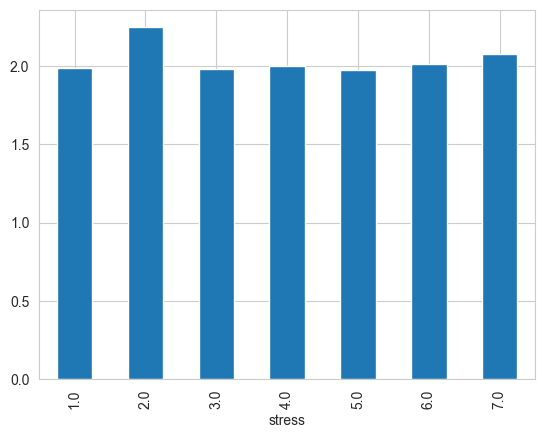

In [311]:
df.groupby("stress").gpa.mean().plot(kind="bar")


In [312]:
df.dropna().groupby("degree").degree.count()


degree
1.0    368
2.0    173
Name: degree, dtype: int64

In [313]:
scipy.stats.pearsonr(df.dropna().gpa, df.dropna().stress)


PearsonRResult(statistic=-0.02986052433315694, pvalue=0.48825547161012095)

In [314]:
print(df.family.corr(df.gpa))
print(df.relationships.corr(df.gpa))
print(df.work.corr(df.gpa))
print(df.life_conditions.corr(df.gpa))
print(df.leisure.corr(df.gpa))
print(df.study.corr(df.gpa))


0.0913587117755866
0.009409364675808751
-0.022423987863752284
0.08521403308797294
0.04991326185258434
0.09992305328209106


In [315]:
df = df.dropna()
df["coping_max"] = df[df.coping_1]
df.groupby("stress")
# df.survey_time.min()


AttributeError: 'DataFrame' object has no attribute 'coping_1'

In [ ]:
print(df.gpa.quantile(0.33), df.gpa.quantile(0.67))


1.7000000476837158 2.299999952316284


In [ ]:
df[df["survey_time"] == 180]


,gpa,semester,degree,age,sex,stress,positive_thinking,relatives,mediation,distraction,...,hobbies_y,sleep_y,yesterday_typical,enough_attendance,enough_preparations,enough_work,enough_housework,enough_hobbies,enough_sleep,survey_time
539,2.7,4.0,1.0,21.0,1.0,5.0,3.0,1.0,2.0,2.0,...,2.0,6.0,3.0,2.0,3.0,1.0,2.0,2.0,1.0,180.0
685,NaN,4.0,3.0,21.0,2.0,6.0,4.0,4.0,1.0,4.0,...,4.0,11.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,180.0


<Axes: xlabel='Stress from study', ylabel='Preparations (hrs/week)'>

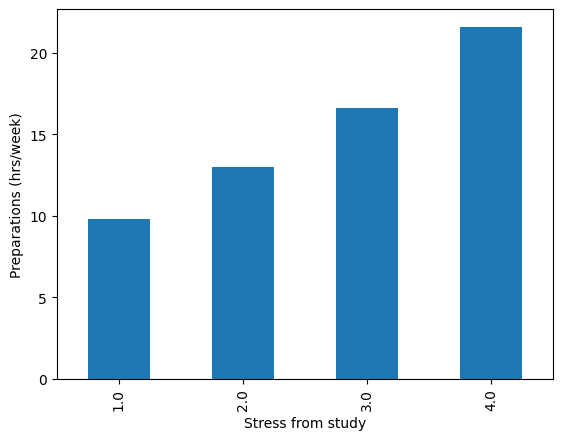

In [ ]:
df.groupby("study").preparations_w.mean().plot(
    kind="bar", xlabel="Stress from study", ylabel="Preparations (hrs/week)"
)


<Axes: xlabel='stress'>

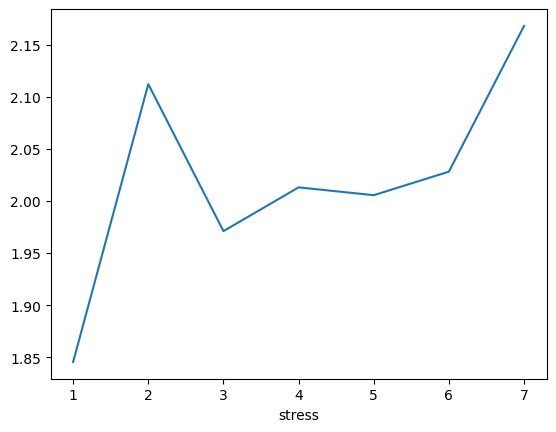

In [ ]:
df.groupby("stress").attendance_w.mean().plot()


<Axes: xlabel='sleep_w', ylabel='gpa'>

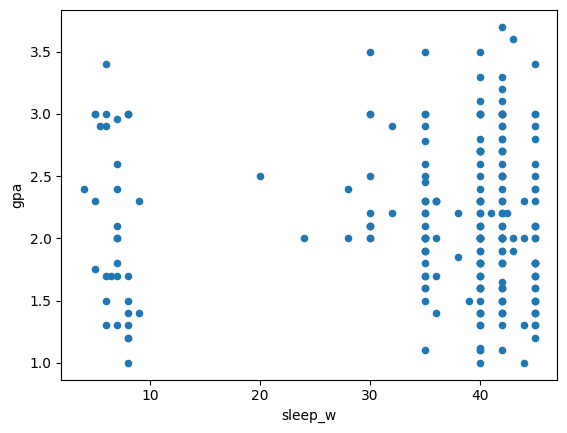

In [ ]:
df[df.sleep_w <= df.sleep_w.quantile(0.33)].plot(
    x="sleep_w", y="gpa", kind="scatter"
)


<Axes: xlabel='sleep_w', ylabel='gpa'>

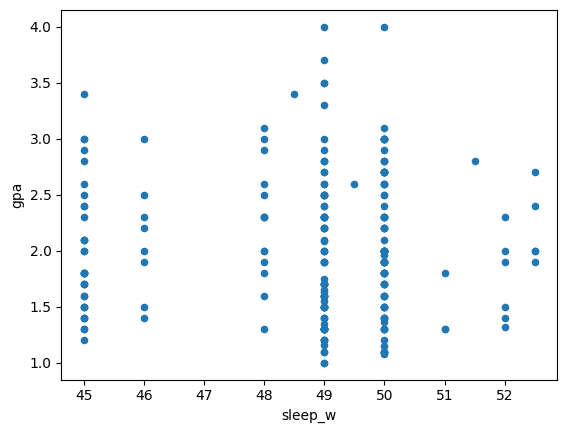

In [ ]:
df[
    (df.sleep_w >= df.sleep_w.quantile(0.33))
    & (df.sleep_w <= df.sleep_w.quantile(0.67))
].plot(x="sleep_w", y="gpa", kind="scatter")


<Axes: xlabel='sleep_w', ylabel='gpa'>

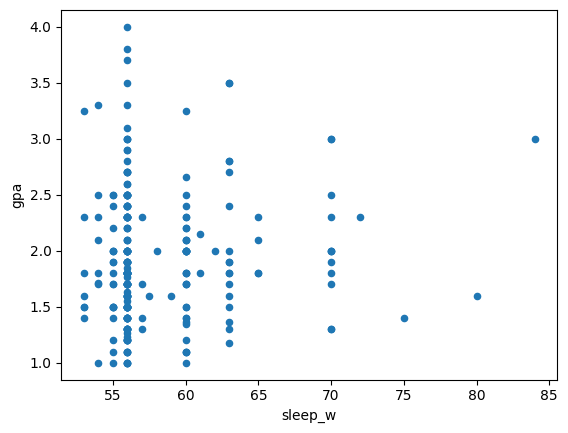

In [ ]:
df[(df.sleep_w >= df.sleep_w.quantile(0.67))].plot(
    x="sleep_w", y="gpa", kind="scatter"
)


In [ ]:
df.sleep_w.corr(df.gpa)
df.preparations_w.corr(df.gpa)


-0.1365447408849339

In [ ]:
df[
    (df["enough_attendance"] == 2)
    & (df["enough_work"] == 2)
    & (df["enough_hobbies"] == 2)
    & (df["enough_sleep"] == 2)
].dropna().gpa.mean()


2.011818177772291

In [ ]:
df.gpa.corr(df.study)


0.10575782181614049

In [ ]:
df["wlb"] = (
    df.attendance_w + df.preparations_w + df.work_w + df.housework_w
) / (df.hobbies_w + df.sleep_w)
df["wlb"] = (df.attendance_w + df.preparations_w) / (df.hobbies_w + df.sleep_w)
THRESHOLD = df.stress.quantile(0.5)
print(
    df[df.stress < THRESHOLD].wlb.mean(),
    df[df.stress < THRESHOLD].stress.mean(),
    df[df.stress < THRESHOLD].gpa.mean(),
)
print(
    df[df.stress >= THRESHOLD].wlb.mean(),
    df[df.stress >= THRESHOLD].stress.mean(),
    df[df.stress >= THRESHOLD].gpa.mean(),
)


0.39309836836968604 3.1844262295081966 1.9972950811268853
0.6158323918482909 5.645161290322581 2.0166666603857473


In [ ]:
df["wlb"] = (
    df.attendance_w + df.preparations_w + df.work_w + df.housework_w
) / (df.hobbies_w + df.sleep_w)
THRESHOLD = df.gpa.quantile(0.33)
print(
    df[df.gpa < THRESHOLD].wlb.mean(),
    df[df.gpa < THRESHOLD].stress.mean(),
    df[df.gpa < THRESHOLD].gpa.mean(),
)
print(
    df[df.gpa >= THRESHOLD].wlb.mean(),
    df[df.gpa >= THRESHOLD].stress.mean(),
    df[df.gpa >= THRESHOLD].gpa.mean(),
)


0.8050332690249804 4.640625 1.359479163462917
0.8164606335064036 4.683962264150943 2.3031132030037216


In [ ]:
df.gpa.corr(df.sleep_w)


-0.0805792171330521

In [ ]:
print(df[df.gpa < df.gpa.quantile(0.33)]["preparations_w"].mean())
print(df[df.gpa >= df.gpa.quantile(0.33)]["preparations_w"].mean())


17.544642857142858
15.233243967828418


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

<Axes: xlabel='attendance_w', ylabel='gpa'>

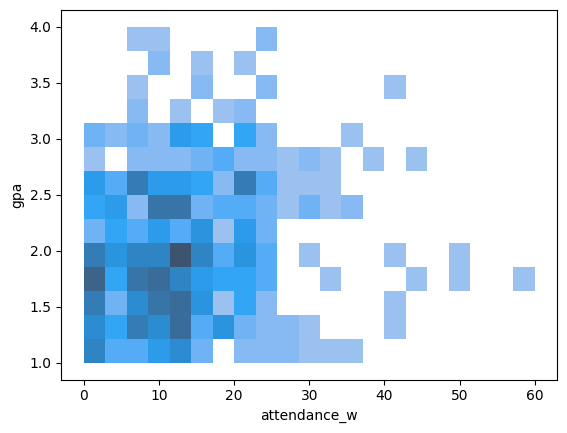

In [ ]:
# sns.lineplot(df[df["attendance_w"] < 30], x="attendance_w", y="gpa")
sns.histplot(df, x="attendance_w", y="gpa")


In [ ]:
df[df.gpa == 1]["attendance_w"]


56      0.0
141    10.0
190     0.0
245    24.0
367    11.0
384    10.0
404     4.0
472    11.5
491     2.0
511    10.0
533    32.0
Name: attendance_w, dtype: float64

In [ ]:
df[df.gpa < df.quantile(0.33)].attendance_w.mean()


ValueError: Can only compare identically-labeled Series objects

In [ ]:
df = df.loc[df["age"] <= 50]
df = df.loc[df["survey_time"] > 1]
df = df.loc[df["semester"] < 24]
df = df.loc[df["degree"].isin((1, 2))]
df = df.loc[df["sleep_w"] > 0]
df = df.loc[df["sleep_w"] <= 80]


/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_16070/2870200659.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.gpa, kde=True, axlabel='GPA')
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_co

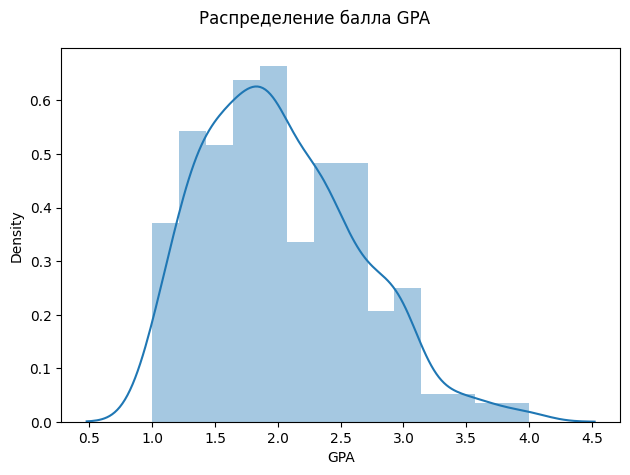

In [ ]:
fig, ax = plt.subplots()
fig.suptitle("Распределение балла GPA")
sns.distplot(df.gpa, kde=True, axlabel="GPA")
plt.tight_layout()
plt.savefig("gpa_dist.svg")


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='gpa', ylabel='attendance_w'>

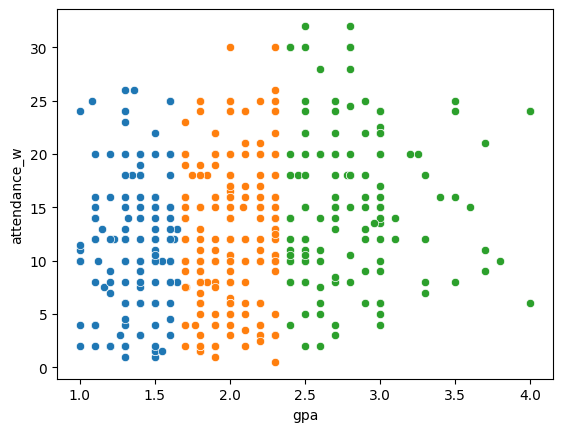

In [ ]:
group1 = df[(df["gpa"] <= 1.7) & (df.attendance_w > 0)]
group2 = df[(df["gpa"] > 1.7) & (df["gpa"] <= 2.3) & (df.attendance_w > 0)]
group3 = df[(df["gpa"] > 2.3) & (df.attendance_w > 0)]

z = np.abs(stats.zscore(group1.attendance_w))
group1 = group1[z < 2]
z = np.abs(stats.zscore(group2.attendance_w))
group2 = group2[z < 2]
z = np.abs(stats.zscore(group3.attendance_w))
group3 = group3[z < 2]

sns.scatterplot(data=group1, x="gpa", y="attendance_w")
sns.scatterplot(data=group2, x="gpa", y="attendance_w")
sns.scatterplot(data=group3, x="gpa", y="attendance_w")


/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_16070/2585959220.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


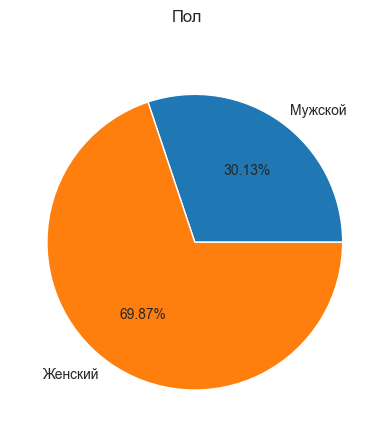

In [395]:
fig, ax = plt.subplots()
sex = df.groupby('sex').sex.count()
sex = sex.rename({1.0: 'Мужской', 2.0: "Женский"})
sex.plot(kind="pie", autopct="%1.2f%%", ax=ax, label='')
fig.suptitle('Пол')
fig.show()
fig.savefig('sex.svg')


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


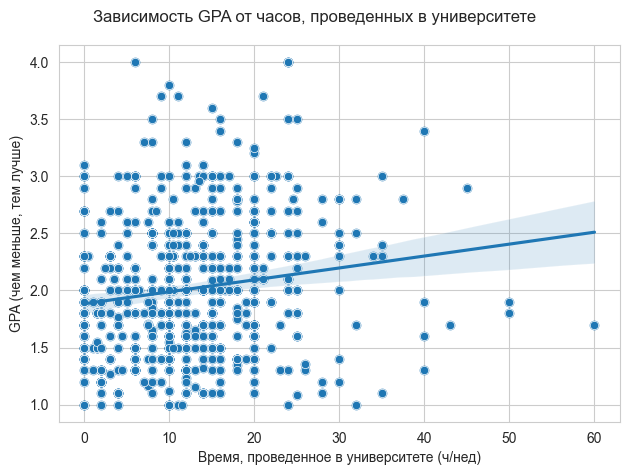

In [360]:
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.regplot(x='attendance_w', y="gpa", data=df)
sns.scatterplot(df, y='gpa', x='attendance_w', ax=ax)
ax.set_xlabel('Время, проведенное в университете (ч/нед)')
ax.set_ylabel('GPA (чем меньше, тем лучше)')
fig.suptitle('Зависимость GPA от часов, проведенных в университете')
fig.tight_layout()
df.gpa.corr(df.attendance_w)
plt.savefig('gpa and attendance.svg')

In [374]:
group1 = df[(df.gpa < df.gpa.quantile(0.33))]
group2 = df[
    (df.gpa > df.gpa.quantile(0.33)) & (df.gpa < df.gpa.quantile(0.67))
]
group3 = df[(df.gpa >= df.gpa.quantile(0.67))]
print(
    group1["attendance_w"].mean(),
    group2["attendance_w"].mean(),
    stats.mannwhitneyu(group1["attendance_w"], group2["attendance_w"]),
)
print(
    group2["attendance_w"].mean(),
    group3["attendance_w"].mean(),
    stats.mannwhitneyu(group2["attendance_w"], group3["attendance_w"]),
)
print(
    group1["attendance_w"].mean(),
    group3["attendance_w"].mean(),
    stats.mannwhitneyu(group1["attendance_w"], group3["attendance_w"]),
)

11.419642857142858 11.977564102564102 MannwhitneyuResult(statistic=12599.5, pvalue=0.5489775407419957)
11.977564102564102 14.764864864864865 MannwhitneyuResult(statistic=11661.0, pvalue=0.0022424629727691137)
11.419642857142858 14.764864864864865 MannwhitneyuResult(statistic=11990.0, pvalue=0.00020571513384914895)


,Unnamed: 0,gpa,semester,degree,age,sex,stress,positive_thinking,relatives,mediation,...,hobbies_y,sleep_y,yesterday_typical,enough_attendance,enough_preparations,enough_work,enough_housework,enough_hobbies,enough_sleep,survey_time
0,244,2.5,8.0,1.0,23.0,2.0,7.0,2.0,2.0,2.0,...,0.0,10.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,10.0
40,335,2.3,8.0,1.0,28.0,2.0,6.0,2.0,3.0,1.0,...,6.0,10.0,2.0,1.0,1.0,2.0,2.0,3.0,1.0,15.0
59,384,2.3,11.0,1.0,27.0,1.0,6.0,3.0,3.0,1.0,...,6.0,6.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,7.0
63,392,2.7,6.0,1.0,22.0,2.0,2.0,1.0,4.0,2.0,...,5.0,9.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,10.0
65,394,1.8,10.0,1.0,24.0,2.0,6.0,3.0,3.0,1.0,...,0.0,6.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,5.0
89,440,2.7,12.0,1.0,32.0,1.0,5.0,1.0,2.0,1.0,...,3.0,7.5,3.0,2.0,2.0,2.0,1.0,1.0,2.0,5.0
135,567,2.2,8.0,1.0,24.0,2.0,4.0,3.0,4.0,1.0,...,13.0,7.0,1.0,2.0,1.0,3.0,3.0,2.0,1.0,5.0
268,857,1.5,6.0,1.0,22.0,2.0,7.0,4.0,3.0,2.0,...,10.5,9.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,10.0
337,1014,2.9,12.0,1.0,23.0,1.0,7.0,1.0,1.0,1.0,...,5.0,10.0,3.0,1.0,1.0,2.0,1.0,2.0,3.0,5.0
362,1070,1.8,8.0,1.0,23.0,2.0,5.0,4.0,2.0,1.0,...,4.0,8.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,10.0


15.102564102564102 14.63905325443787 p-value: 0.5475980041176524
16.51923076923077 14.059171597633137 p-value: 0.031713576217149014
r1: PearsonRResult(statistic=0.024400016694963122, pvalue=0.6408214864800363)
r2: PearsonRResult(statistic=-0.11856178036108823, pvalue=0.022923916115010223)


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

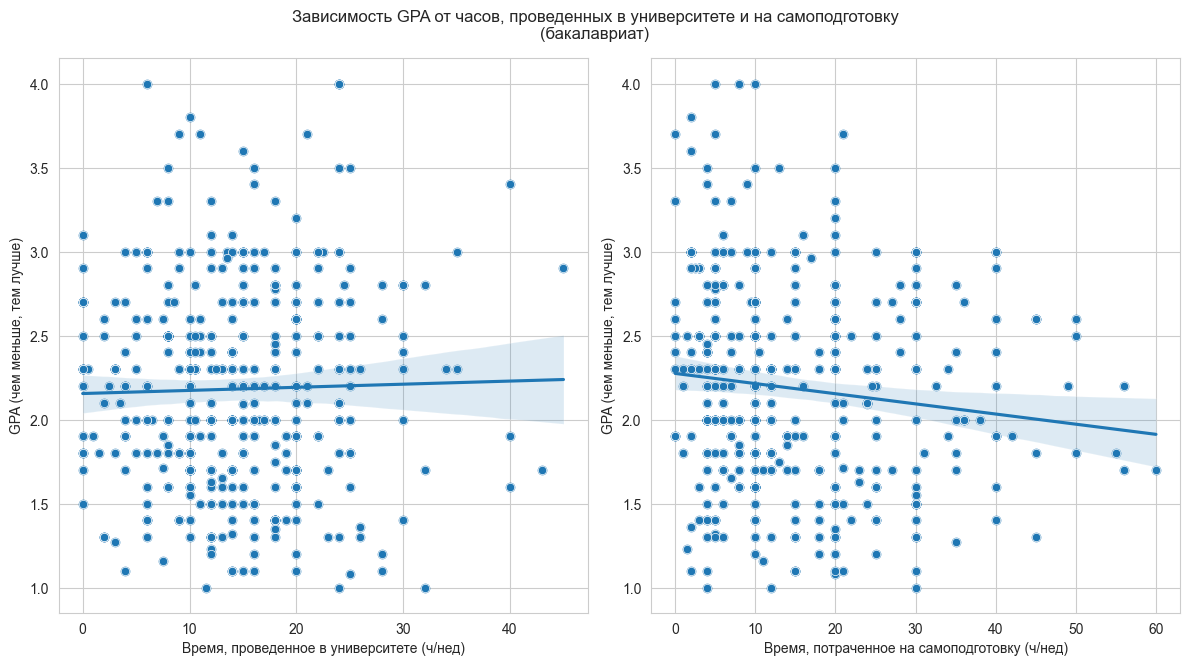

In [422]:
df = df.loc[df["age"] <= 50]
df = df.loc[df["survey_time"] > 1]
df = df.loc[df["semester"] < 24]
df = df.loc[df["degree"] != 6]
df = df.loc[df["sleep_w"] > 0]
df = df.loc[df["sleep_w"] <= 80]

df = df.dropna()

group1b = df[(df.gpa < df.gpa.quantile(0.33)) & (df.degree == 1)]
group1m = df[(df.gpa < df.gpa.quantile(0.33)) & (df.degree == 2)]
group3b = df[(df.gpa >= df.gpa.quantile(0.67)) & (df.degree == 1)]
group3m = df[(df.gpa >= df.gpa.quantile(0.67)) & (df.degree == 2)]

print(
    group1b.attendance_w.mean(),
    group3b.attendance_w.mean(),
    "p-value:",
    stats.mannwhitneyu(group1b.attendance_w, group3b.attendance_w).pvalue,
)
print(
    group1b.preparations_w.mean(),
    group3b.preparations_w.mean(),
    "p-value:",
    stats.mannwhitneyu(group1b.preparations_w, group3b.preparations_w).pvalue,
)


data = df[(df.degree == 1)]
fig, ax = plt.subplots(1, 2)
fig.suptitle(
    "Зависимость GPA от часов, проведенных в университете и на самоподготовку\n" +
    "(бакалавриат)"
)
fig.set_size_inches(12, 6.75)
sns.set_style("whitegrid")
sns.regplot(x="attendance_w", y="gpa", data=data, ax=ax[0])
sns.scatterplot(data=data, y="gpa", x="attendance_w", ax=ax[0])
ax[0].set_xlabel("Время, проведенное в университете (ч/нед)")
ax[0].set_ylabel("GPA (чем меньше, тем лучше)")
sns.regplot(x="preparations_w", y="gpa", data=data, ax=ax[1])
sns.scatterplot(data=data, y="gpa", x="preparations_w", ax=ax[1])
ax[1].set_xlabel("Время, потраченное на самоподготовку (ч/нед)")
ax[1].set_ylabel("GPA (чем меньше, тем лучше)")
fig.tight_layout()
print("r1:", stats.pearsonr(data.gpa, data.attendance_w))
print("r2:", stats.pearsonr(data.gpa, data.preparations_w))
plt.savefig("bachelor gpa vs. attendance and preparations.svg")


8.227777777777778 16.09375 p-value: 0.018433836188797348
18.433333333333334 14.3125 p-value: 0.26829347214720733


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

r1: PearsonRResult(statistic=0.1766717564447202, pvalue=0.020059712642139026)
r2: PearsonRResult(statistic=-0.1259450227832214, pvalue=0.09871403692652496)


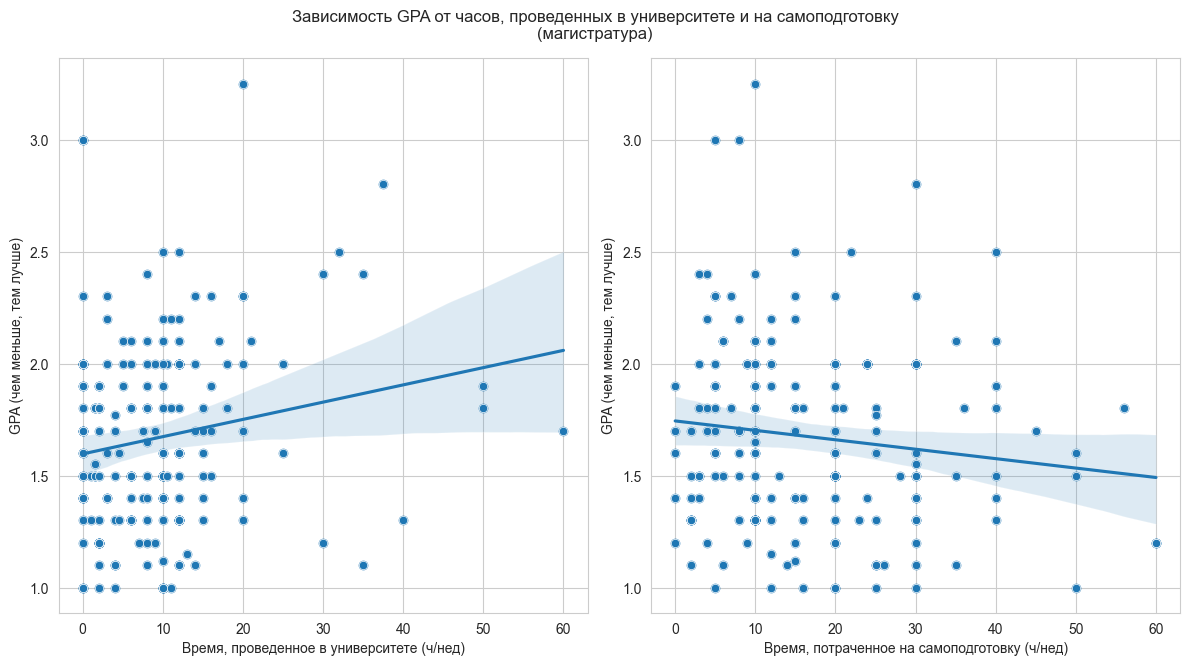

In [425]:
print(
    group1m.attendance_w.mean(),
    group3m.attendance_w.mean(),
    "p-value:",
    stats.mannwhitneyu(group1m.attendance_w, group3m.attendance_w).pvalue,
)
print(
    group1m.preparations_w.mean(),
    group3m.preparations_w.mean(),
    "p-value:",
    stats.mannwhitneyu(group1m.preparations_w, group3m.preparations_w).pvalue,
)


data = df[(df.degree == 2)]
fig, ax = plt.subplots(1, 2)
fig.suptitle(
    "Зависимость GPA от часов, проведенных в университете и на самоподготовку\n" +
    "(магистратура)"
)
fig.set_size_inches(12, 6.75)
sns.set_style("whitegrid")
sns.regplot(x="attendance_w", y="gpa", data=data, ax=ax[0])
sns.scatterplot(data=data, y="gpa", x="attendance_w", ax=ax[0])
ax[0].set_xlabel("Время, проведенное в университете (ч/нед)")
ax[0].set_ylabel("GPA (чем меньше, тем лучше)")
sns.regplot(x="preparations_w", y="gpa", data=data, ax=ax[1])
sns.scatterplot(data=data, y="gpa", x="preparations_w", ax=ax[1])
ax[1].set_xlabel("Время, потраченное на самоподготовку (ч/нед)")
ax[1].set_ylabel("GPA (чем меньше, тем лучше)")
fig.tight_layout()
print("r1:", stats.pearsonr(data.gpa, data.attendance_w))
print("r2:", stats.pearsonr(data.gpa, data.preparations_w))
plt.savefig("master gpa vs. attendance and preparations.svg")
